# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [65]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [66]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [67]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/debisreeray/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


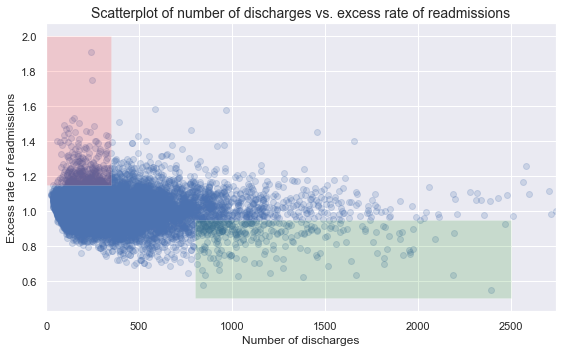

In [68]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Question A:

**Do you agree with the above analysis and recommendations? Why or why not?**

I mostly do not agree with the initial report. The report lacks any statistical analysis. They analyzed based on a graph. The conclusion drawn from the graph is also not very clear and sound. No analysis was done to establish a correlation between hospital capacity (number of discharges) and readmission rates. A statistical hypothesis test should have been implemented to infer whether observed correlations are statistically significant or not. Also, there are some data missing in the 'Excess Readmission Ratio' column, which needs to be taken care.


In [69]:
df1= clean_hospital_read_df
df1.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [70]:
df1.shape

(11578, 12)

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [72]:
df1.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [96]:
#df1.dropna(subset=['Number of Readmissions'], inplace=True)
df = df1.dropna(subset=['Excess Readmission Ratio'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [74]:
df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


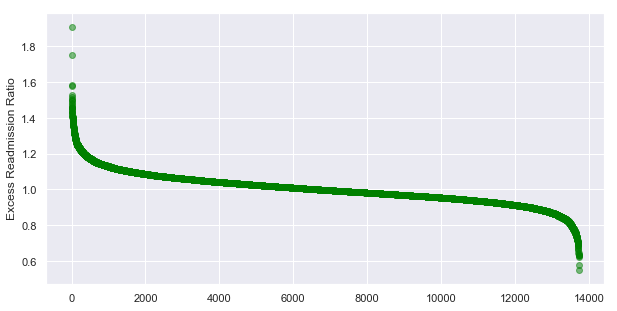

In [97]:
#Visual interpretetion
sns.set(color_codes=True)
x= df['Excess Readmission Ratio']
#print(x)

plt.figure(figsize=(10,5))
_= plt.scatter(x.index,x.values,color='green',alpha =0.5)
_=plt.xlabel('')
_=plt.ylabel('Excess Readmission Ratio')
plt.show()

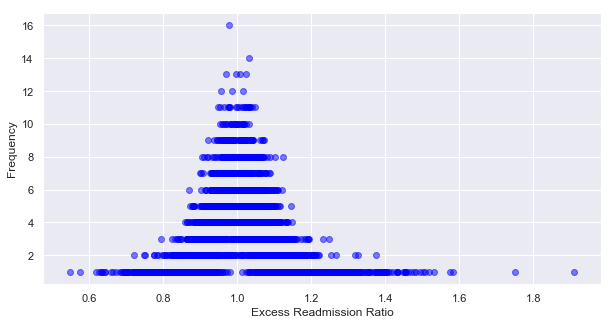

In [98]:
m=x.value_counts()
#print(m)
#x1= m.index
#y1=m.values
plt.figure(figsize=(10,5))
_= plt.scatter(m.index,m.values,color='blue',alpha =0.5)
_=plt.ylabel('Frequency')
_=plt.xlabel('Excess Readmission Ratio')
plt.show()

# Question B:

**Provide support for your arguments and your own recommendations with a statistically sound analysis:**

* Setup an appropriate hypothesis test.
* Compute and report the observed significance value (or p-value).
* Report statistical significance for  α  = .01.
* Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
* Look at the scatterplot above.  <br/>
What are the advantages and disadvantages of using this plot to convey information? </br>
Construct another plot that conveys the same information in a more direct manner.

### Hypothesis Test :

The **Null Hypothesis  H$_0$ :** There is no significant correlation between the hospital capacity (number of discharges) and readmission rates.

The **Alternative Hypothesis  H$_a$ :** There is a significant correlation between hospital capacity (number of discharges) and readmission rates.

**Test statistics:** pearson correlation coefficient  $\rho$ 

$\alpha$ = 0.01

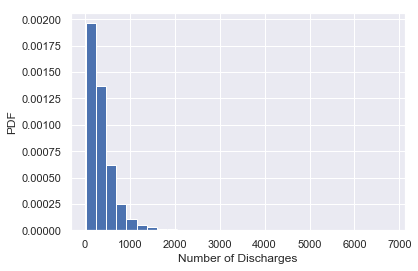

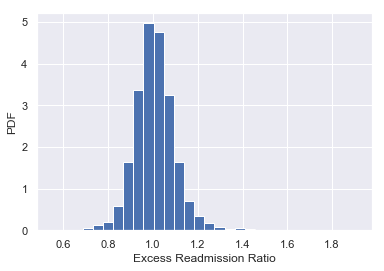

p-value for the test of 'Number of discharges' is:  0.0
p-value for the test of 'Excess readmission ratio' is:  0.0


In [99]:
#Histograms:
x1= df['Number of Discharges']
x2= df['Excess Readmission Ratio']

_ = plt.hist(x1,density=True,bins=30)
plt.xlabel("Number of Discharges")
plt.ylabel("PDF")
plt.show()


_ = plt.hist(x2,density=True,bins=30)
plt.xlabel("Excess Readmission Ratio")
plt.ylabel("PDF")
plt.show()

#to test the normality:

x1= df['Number of Discharges']
x2= df['Excess Readmission Ratio']

k21, p1 = stats.normaltest(x1)
print("p-value for the test of 'Number of discharges' is: ", p1)

k22, p2 = stats.normaltest(x2)
print("p-value for the test of 'Excess readmission ratio' is: ", p2)

So, what we see from above is, both 'Number of Discharges' and 'Excess Readmission Ratio' are not normally distributed. 

        
        
### Bootstrap method with permutation to calculate the p-value:

As we have concluded above, the desired abservable arrays are not normally distributed. Therefore, a simple $t$ test of pearson coefficent or the 'scipy.stats.pearsonr' function can not be used to compute the p-value and test for the non-correlation in this case. Because for both of the methods, it requires that each dataset needs to follow a normal distribution.

The Permutation test of correlation works with small sample size and non-normally distributed variables. The permutation test involves randomly re-pairing the variables so as to create a distribution of pearson coefficents. 

In [100]:

def pearson(m, n):
    """compute and return the pearson correlation coefficient r between the two arrays"""
    corr = np.corrcoef(m,n)
    return corr[0,1]

r = pearson(x1,x2)

bs_replicates = np.empty(10000)

for i in range(10000):
    x1_p = np.random.permutation(x1)
    bs_replicates[i] = pearson(x1_p,x2)

p = np.sum(bs <= r)/len(bs)

print("The pearson's correlation coefficient: " +str(r))
print("The p-value: " +str(p))


The pearson's correlation coefficient: -0.09739794351079353
The p-value: 0.0


From the above test, we got the p-value, which is less than the ignificance level  $\alpha$=0.01, therefore, the null hypothesis is rejected. So, there is a statistical significance that the hospital capacity (number of discharges) and the readmission rates are correlated.

Although there is a statistically significant correlation, it is a weak correlation. 

* The scatterplot showing the correlation above (in the analysis supplied):

Advantages:
- visually appealing (shaded regions)
- Depicts the density of the distributions across the both axis.

Disadvantages:
- no "correlation coefficient" or relationship shown
- no indication of the distribution of each individual statistic.

The main problem of the plot (above) is that it's unclear and not explained properly. The meaning of the Excess Rate of Readmission is not clear, also the plot doesn't draw a clear relationship between the variables. We can see, a weak correlation between the variables, however, it has been claimed to have a strong correlation in the written analysis.

One simple improvement to the graph would be to add a linear regression line. This makes the correlation more explicit.

/Users/debisreeray/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x360 with 0 Axes>

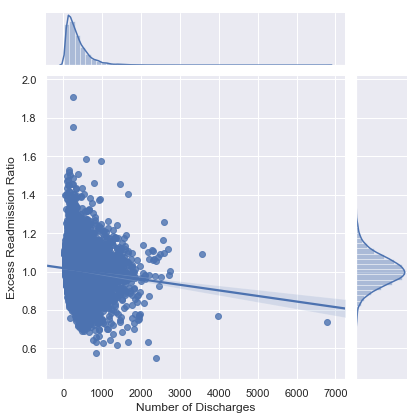

In [111]:
# scatterplot
sns.set()
plt.figure(figsize=(10,5))
_=sns.jointplot(df['Number of Discharges'], df['Excess Readmission Ratio'],kind='reg')
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
#g.fig.suptitle('Weak correlation between excess rate of readmission & number of discharges \n')
plt.show()

/Users/debisreeray/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


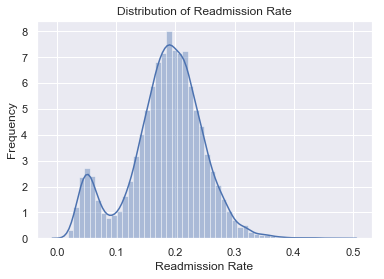

In [115]:
df['Readmission Rate'] = df['Number of Readmissions']/df['Number of Discharges']

# Histogram of the Readmission to Discharge ratio
_ = sns.distplot(df['Readmission Rate'])
_ = plt.title('Distribution of Readmission Rate')
_ = plt.xlabel('Readmission Rate')
_ = plt.ylabel('Frequency')

plt.show()

The graph above shows that the Readmission Ratio follows a bimodal distribution. Hospitals cluster in to two groups.

### Do small hospitals readmit a higher ratio of patients than the large hospitals?

* Small Hospitals: If the number of discharges < 300
* Large Hospitals: If the number of discharges $\ge$ 300

/Users/debisreeray/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


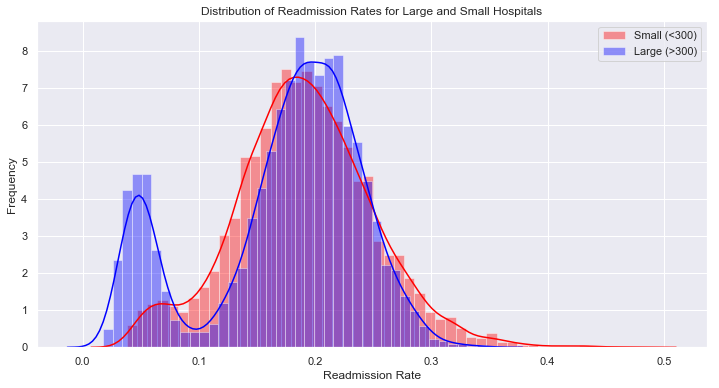

In [129]:
small = df[df['Number of Discharges'] < 300]
large = df[df['Number of Discharges'] >= 300]

fig = plt.figure(figsize=(12,6))
_ = sns.distplot(small['Readmission Rate'],color= 'red')
_= sns.distplot(large['Readmission Rate'], color = 'blue')
plt.legend(['Small (<300)','Large (>300)'])
plt.xlabel('Readmission Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Readmission Rates for Large and Small Hospitals')
plt.show()

/Users/debisreeray/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


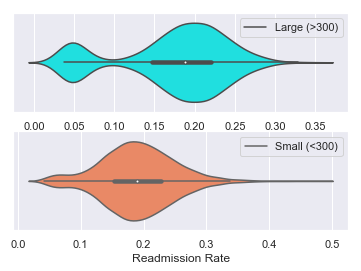

In [149]:
#Violinplot for better understanding:

plt.figure()
plt.subplot(211)

ax1= sns.violinplot(large['Readmission Rate'],color='cyan')
plt.legend(['Large (>300)'])
plt.subplot(212)
ax2=sns.violinplot(small['Readmission Rate'],color='coral')
plt.legend(['Small (<300)'])

plt.show()

The 'Large' group of hospitals( with > 300 discharges) have a larger portion of facilities with less Readmission rate. Both the sample populations have a bimodal distribution. So, both the groups of hospitals tend to cluster around a 20% rate and 5% rate. 